##**Import Required Libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

## **Load and Normalize the Data**

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


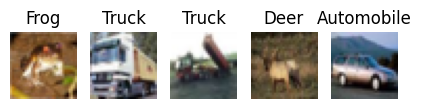

In [3]:
# Load CIFAR-10 data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values to the range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Display a few samples
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
fig, axes = plt.subplots(1, 5, figsize=(5, 5))
for i in range(5):
    axes[i].imshow(X_train[i])
    axes[i].set_title(class_names[np.argmax(y_train[i])])
    axes[i].axis('off')
plt.show()

 ## **Build the CNN Model**

In [4]:
model = Sequential()

# Convolutional Layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer='l2'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer='l2'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 12, 12, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 272,170 (1.04 MB)

 Trainable params: 271,978 (1.04 MB)

 Non-trainable params: 192 (768.00 B)

## **Train the Model**


In [5]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=1)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.2632 - loss: 4.2335 - val_accuracy: 0.3448 - val_loss: 2.1772
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.4792 - loss: 1.7853 - val_accuracy: 0.5594 - val_loss: 1.5741
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5449 - loss: 1.5816 - val_accuracy: 0.5297 - val_loss: 1.5837
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5823 - loss: 1.5112 - val_accuracy: 0.4695 - val_loss: 1.9301
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5938 - loss: 1.4725 - val_accuracy: 0.1153 - val_loss: 6.6020
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5968 - loss: 1.4612 - val_accuracy: 0.4101 - val_loss: 2.4288
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6127 - loss: 1.4364 - val_accuracy: 0.4582 - val_loss: 1.9493
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6199 - loss: 1.4127 - val_accuracy: 

## **Data Augmentation**

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Fit the augmentation generator to the training data
datagen.fit(X_train)

## **Global Average Pooling**

In [14]:
from tensorflow.keras.layers import GlobalAveragePooling2D

##**Revised Model**

In [15]:
model = Sequential()

# First Convolutional Block
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer='l2', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer='l2', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Second Convolutional Block
model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer='l2', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer='l2', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Third Convolutional Block
model.add(Conv2D(256, (3, 3), activation='relu', kernel_regularizer='l2', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu', kernel_regularizer='l2', padding='same'))
model.add(GlobalAveragePooling2D())  # Replace Flatten with GAP

# Fully Connected Layers
model.add(Dense(512, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,283,914 (4.90 MB)

 Trainable params: 1,283,018 (4.89 MB)

 Non-trainable params: 896 (3.50 KB)

## **Re-Train the Model**

In [16]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=128),
                    epochs=20,
                    validation_data=(X_test, y_test),
                    verbose=1)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


391/391 ━━━━━━━━━━━━━━━━━━━━ 58s 120ms/step - accuracy: 0.3565 - loss: 6.4510 - val_accuracy: 0.1723 - val_loss: 3.3588
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 66s 96ms/step - accuracy: 0.5571 - loss: 1.7794 - val_accuracy: 0.5340 - val_loss: 1.7593
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 96ms/step - accuracy: 0.6203 - loss: 1.4775 - val_accuracy: 0.5623 - val_loss: 1.8618
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 95ms/step - accuracy: 0.6582 - loss: 1.3531 - val_accuracy: 0.6366 - val_loss: 1.4143
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 94ms/step - accuracy: 0.6879 - loss: 1.2778 - val_accuracy: 0.4247 - val_loss: 2.7875
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 39s 91ms/step - accuracy: 0.7002 - loss: 1.2390 - val_accuracy: 0.6828 - val_loss: 1.2885
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 95ms/step - accuracy: 0.7104 - loss: 1.2144 - val_accuracy: 0.7285 - val_loss: 1.1586
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 95ms/step - accuracy: 0.7225 - loss: 1.1752 - val_accura

## **Visualize Training Progress**

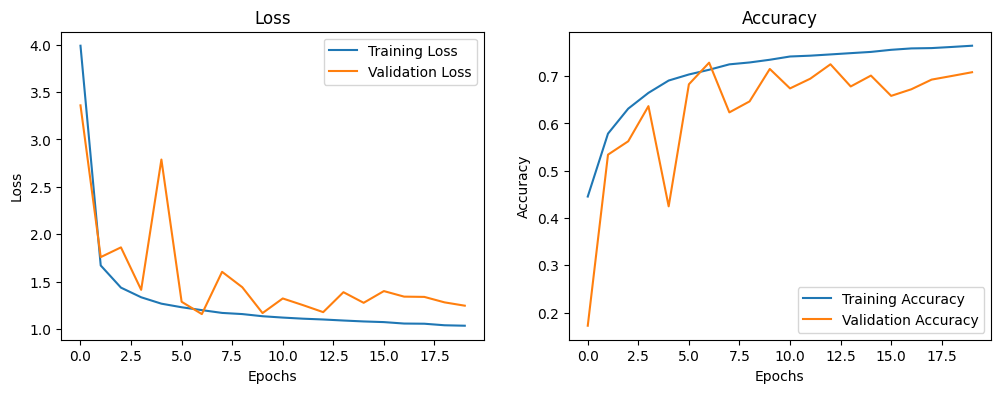

In [17]:
# Plot training history
plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


##**Evaluate the Improved Model**

Test Loss: 1.2472
Test Accuracy: 0.7083
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


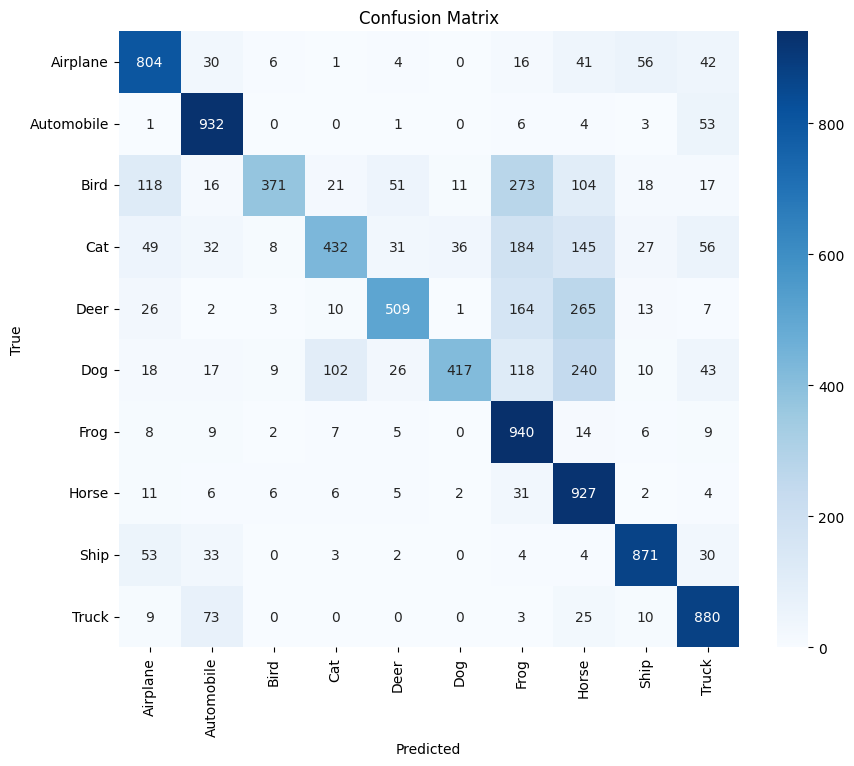

              precision    recall  f1-score   support

    Airplane       0.73      0.80      0.77      1000
  Automobile       0.81      0.93      0.87      1000
        Bird       0.92      0.37      0.53      1000
         Cat       0.74      0.43      0.55      1000
        Deer       0.80      0.51      0.62      1000
         Dog       0.89      0.42      0.57      1000
        Frog       0.54      0.94      0.69      1000
       Horse       0.52      0.93      0.67      1000
        Ship       0.86      0.87      0.86      1000
       Truck       0.77      0.88      0.82      1000

    accuracy                           0.71     10000
   macro avg       0.76      0.71      0.69     10000
weighted avg       0.76      0.71      0.69     10000



In [18]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Confusion Matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print(classification_report(y_true, y_pred_classes, target_names=class_names))


## **Save CNN Model**

In [19]:
model.save('cifar10_cnn_model.h5')
print("Model saved successfully.")

Model saved successfully.


In [21]:
!pip install streamlit tensorflow pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 75.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 115.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.8 MB/s eta 0:00:00


## **Import and Save MobileNetV2 Model**

In [24]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import load_model

# Save MobileNetV2
mobilenet_model = MobileNetV2(weights='imagenet', include_top=True)
mobilenet_model.save('mobilenetv2.h5')

## **Create Streamlit app**

In [26]:
import streamlit as st
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions

# Load models
cnn_model = load_model('cifar10_cnn_model.h5')
mobilenet_model = load_model('mobilenetv2.h5')

# CIFAR-10 Class Names
cifar10_classes = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

def classify_image_cnn(image):
    # Preprocess for CNN
    image = image.resize((32, 32))
    image_array = np.array(image) / 255.0  # Normalize
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    predictions = cnn_model.predict(image_array)
    class_idx = np.argmax(predictions)
    confidence = predictions[0][class_idx]
    return cifar10_classes[class_idx], confidence

def classify_image_mobilenet(image):
    # Preprocess for MobileNetV2
    image = image.resize((224, 224))
    image_array = np.array(image)
    image_array = preprocess_input(np.expand_dims(image_array, axis=0))
    predictions = mobilenet_model.predict(image_array)
    decoded_predictions = decode_predictions(predictions, top=1)[0][0]
    return decoded_predictions[1], decoded_predictions[2]

# Streamlit App
st.title("Image Classification App")
st.write("Upload an image to classify it using either the custom CNN model or MobileNetV2.")

# File uploader
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file:
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image', use_column_width=True)
    st.write("")

    # Model Selection
    model_choice = st.radio("Select a model for classification:", ('Custom CNN', 'MobileNetV2'))

    if st.button("Classify"):
        if model_choice == 'Custom CNN':
            class_name, confidence = classify_image_cnn(image)
            st.write(f"**Prediction:** {class_name}")
            st.write(f"**Confidence:** {confidence:.2f}")
        elif model_choice == 'MobileNetV2':
            class_name, confidence = classify_image_mobilenet(image)
            st.write(f"**Prediction:** {class_name}")
            st.write(f"**Confidence:** {confidence:.2f}")


2024-12-08 19:18:43.342 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-08 19:18:43.413 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-12-08 19:18:43.415 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-08 19:18:43.417 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-08 19:18:43.419 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-08 19:18:43.421 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-08 19:18:43.424 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-08 19:18:43.426 Thread 'MainThread': mi

In [27]:
# find ipv4 addrss with iget

!curl ifconfig.me

34.118.242.129

In [28]:
# install localtunnel

!npm install -g localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇
added 22 packages in 4s
⠇
⠇3 packages are looking for funding
⠇  run `npm fund` for details
⠇

In [ ]:
! streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸⠼⠴
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.118.242.129:8501

⠦⠧your url is: https://grumpy-windows-peel.loca.lt
2024-12-08 19:23:15.940444: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-08 19:23:15.964416: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-08 19:23:15.971921: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-08 19:23:17.042109: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
I0000 00